In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

[[  0   1   2 ...   6  18 118]
 [  1   1   2 ...   7  19 107]
 [  1   1   3 ...   5  18 108]
 ...
 [  1   1   2 ...   5  17 123]
 [  1   0   1 ...   8  17 104]
 [  1   1   1 ...   6  18 128]]


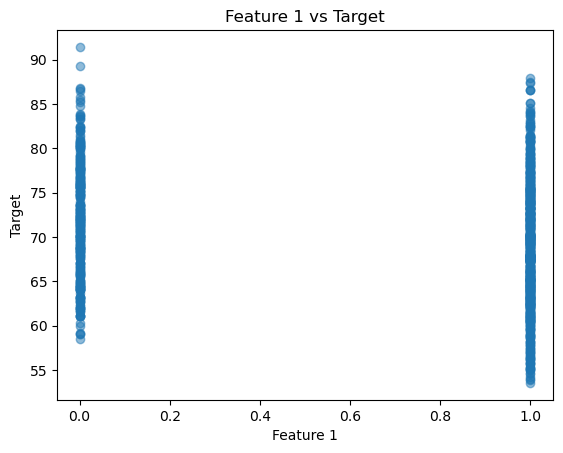

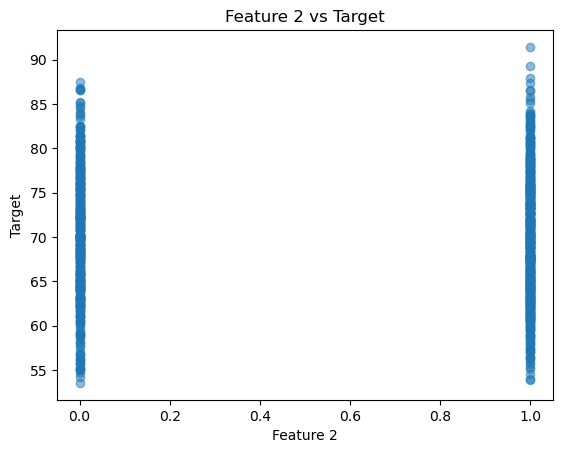

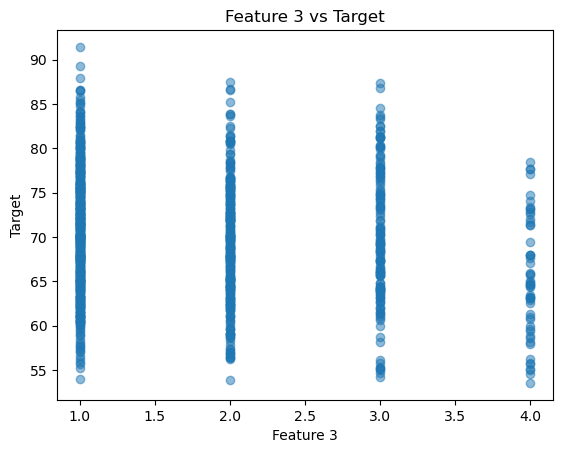

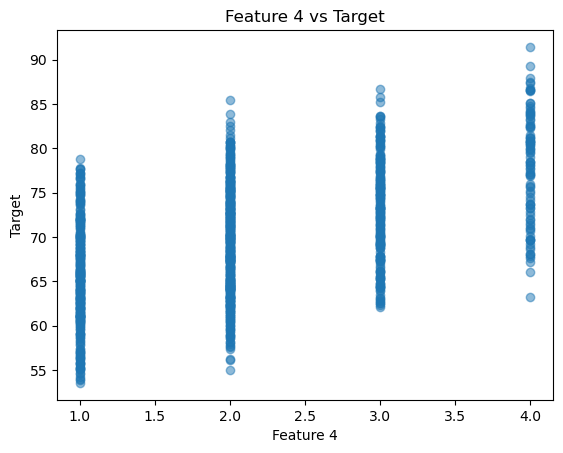

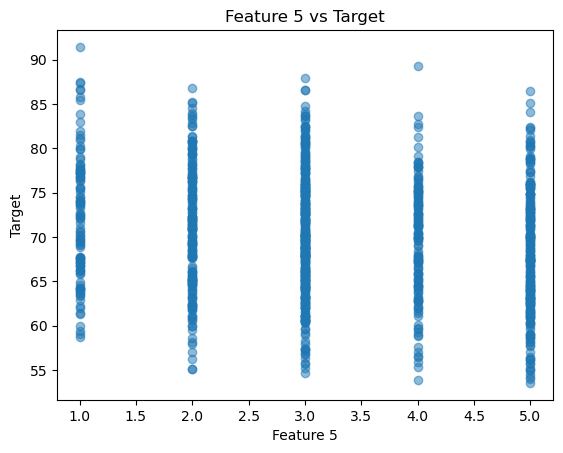

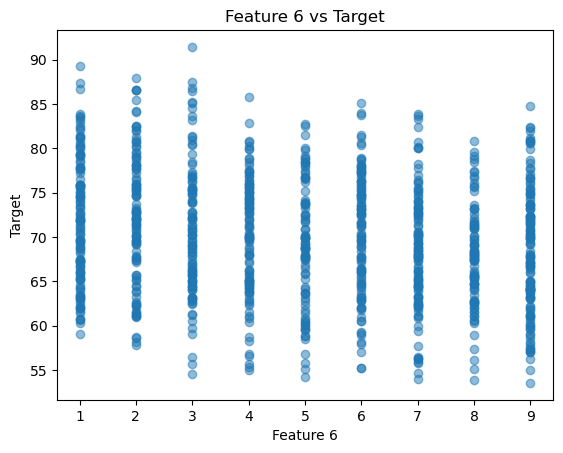

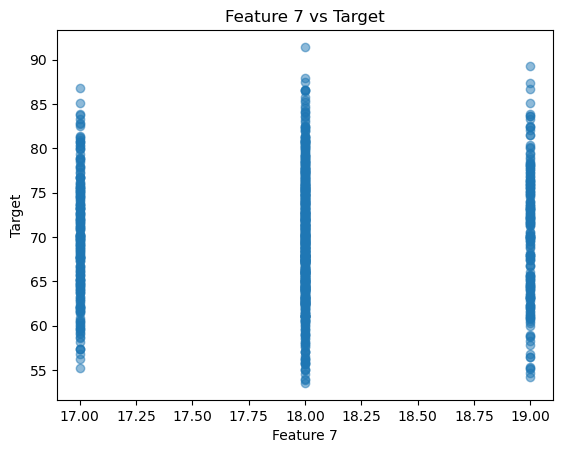

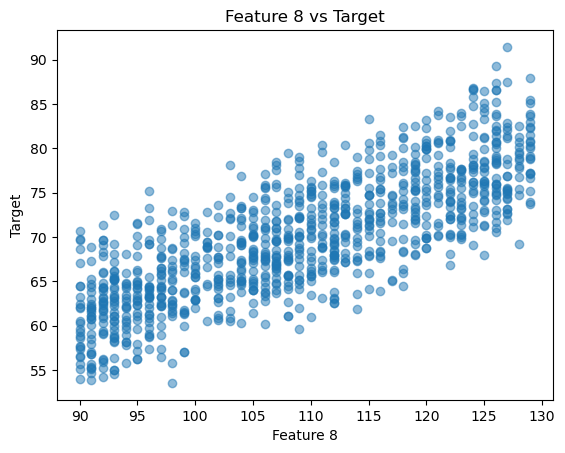

In [2]:
# Use the file namd 'training data' to train the model
data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)
# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM
def feature_changing(x_train):
    x_train[x_train == 'no'] = 0
    x_train[x_train == 'yes'] = 1
    x_train[x_train == 'M'] = 1
    x_train[x_train == 'F'] = 0
    return x_train.astype(int)
x_train = feature_changing(x_train)
print(x_train)
def plot_features(x_train, y_train):
    num_features = x_train.shape[1]
    for i in range(num_features):
        plt.figure()
        plt.scatter(x_train[:, i], y_train, alpha=0.5)
        plt.xlabel(f'Feature {i+1}')
        plt.ylabel('Target')
        plt.title(f'Feature {i+1} vs Target')
        plt.show()
plot_features(x_train, y_train)

In [3]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
    x_std = np.std(x_train,axis=0)
    x_mean = np.mean(x_train,axis=0)
    x_train = (x_train-x_mean)/x_std
  # ---------

    return x_train,x_std,x_mean

In [4]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    m = x_train.shape[0]
    y_pred = np.dot(x_train,w)+b
    loss = np.sum((y_pred-y_train)**2)
    loss/=2*m
    # return cost
  # ---------

    return loss

In [5]:
def gradient_descent(x_train, y_train, w, b):
    m = x_train.shape[0]  
    alpha = 0.01 
    y_pred = np.dot(x_train, w) + b  
    dw = np.dot(x_train.T, (y_pred - y_train)) / m 
    db = np.sum(y_pred - y_train) / m  

    w -= alpha * dw 
    b -= alpha * db

    return w, b

In [6]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)
old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
    old_cost = cost(x_train,y_train,w,b)
    w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
        accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
